In [5]:
## Cost to materials, and normalized by weight
# [$/lb]
m = -0.07 # manual demanufacturing 
s = -0.04 # shredding 
f = -0.03 # metal finder 

## Price to sell for TV's
# price per pound multiplied by percentage of TV unit is
steel = 0.06 * 0.0299 
boards2 = 0.35 * 0.0699
wire = 0.46 * 0.0099
plastic = 0.07 * 0.0599
cones = 0.42 * 0.0249
dwire = 0.65 * 0.0099
pcopper = 0.08 * 0.0240
palum = 0.45 * 0.0019
tube = 0.06 * 0.1499
leadglass = -0.13 * 0.62
processing_cost = sum([steel boards2 wire plastic cones dwire pcopper palum tube leadglass])


-0.016932000000000003

In [25]:
function holding_cost(x,y) 
    holding_factor = 1 # Place holder for holding cost [$/(gaylord of space)]
    return -1*holding_factor*(div(x,y)+1) # where x is pounds of material, and y is [lbs/gaylord]
end
function shipping_cost(x,y)
    shipping_factor = 1 # place holder for shipping cost [$/(gaylord sent)]
    return -1*shipping_factor*(div(x,y)+1)# where x is pounds of material, and y is [lbs/gaylord]
end

shipping_cost (generic function with 1 method)

In [26]:
function pre_process_cost(x,t)
    ## Cost to materials, and normalized by weight
    # [$/lb]
    m = -0.07 # manual demanufacturing 
    s = -0.04 # shredding 
    f = -0.03 # metal finder 

    ## Price to sell for TV's
    # price per pound multiplied by percentage of TV unit is
    steel = 0.06 * 0.0299 
    boards2 = 0.35 * 0.0699
    wire = 0.46 * 0.0099
    plastic = 0.07 * 0.0599
    cones = 0.42 * 0.0249
    dwire = 0.65 * 0.0099
    pcopper = 0.08 * 0.0240
    palum = 0.45 * 0.0019
    tube = 0.06 * 0.1499
    leadglass = -0.13 * 0.62
    selling_price = sum([steel boards2 wire plastic cones dwire pcopper palum tube leadglass])
    
    return 0.10 + x*(m+s+f) + selling_price + t*holding_cost(x,450) + shipping_cost(x,10000)
end

pre_process_cost (generic function with 1 method)

In [27]:
function post_process_cost(x, proccess_t, t)
    orig_weight = x/0.62
    accum_cost = pre_process_cost(orig_weight, proccess_t)
    
    return 0.10*x + t*holding_cost(x,450) + shipping_cost(x,10000)
end

post_process_cost (generic function with 1 method)

In [28]:
n = 1000
pre_cost = zeros(n,n)
weight_spread = linspace(400,20000,n)
time = linspace(1,n,n)

for i=1:n
    for j=1:n
        pre_cost[i,j] = pre_process_cost(weight_spread[i], time[j])
    end
end

In [10]:
using Plots


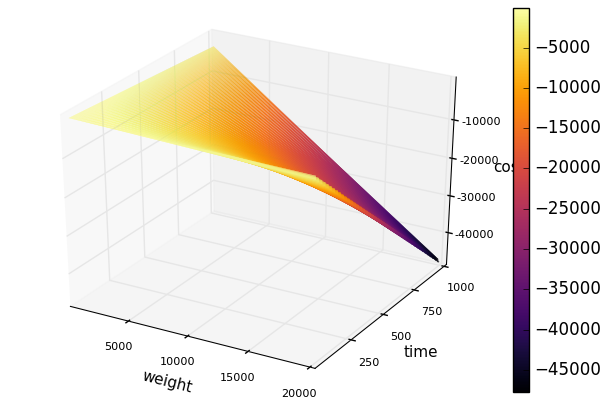

In [29]:
plot(weight_spread, time, pre_cost,st=:surface,xlab = "weight", ylab = "time", zlab = "cost")

In [30]:
savefig("costsurface.png")